# Data Loading


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CapstoneProject/dataset.csv')
print(dataset.shape)

dataset.head()

(9450, 34)


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29 – 13.74],NaN,NaN,EN,8/12/2022 0:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44 – 12.55],NaN,NaN,EN,8/12/2022 0:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73 – 10.39],NaN,NaN,EN,8/12/2022 0:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07 – 13.2],NaN,NaN,EN,8/12/2022 0:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23 – 12.46],NaN,NaN,EN,8/12/2022 0:00


Data preparation


In [ ]:
#Null values
dataset.isnull().sum()

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefix    9450
FactValueNumericHigh

In [ ]:
columns_to_remove = ['IndicatorCode', 'Indicator', 'ValueType', 'Location type', 'Period type', 'Dim1 type', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']

# Remove the specified columns
dataset = dataset.drop(columns=columns_to_remove)

In [ ]:
print(dataset.shape)
dataset

(9450, 12)


,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AFR,Africa,KEN,Kenya,2019,True,Cities,CITY,10.01,6.29,13.74,10.01 [6.29 – 13.74]
1,AMR,Americas,TTO,Trinidad and Tobago,2019,True,Rural,RUR,10.02,7.44,12.55,10.02 [7.44 – 12.55]
2,EUR,Europe,GBR,United Kingdom of Great Britain and Northern I...,2019,True,Cities,CITY,10.06,9.73,10.39,10.06 [9.73 – 10.39]
3,AMR,Americas,GRD,Grenada,2019,True,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07 – 13.2]
4,AMR,Americas,BRA,Brazil,2019,True,Towns,TOWN,10.09,8.23,12.46,10.09 [8.23 – 12.46]
...,...,...,...,...,...,...,...,...,...,...,...,...
9445,AMR,Americas,BLZ,Belize,2010,False,Cities,CITY,9.92,3.91,20.28,9.92 [3.91 – 20.28]
9446,AMR,Americas,TTO,Trinidad and Tobago,2010,False,Cities,CITY,9.92,7.80,12.89,9.92 [7.8 – 12.89]
9447,AFR,Africa,KEN,Kenya,2010,False,Cities,CITY,9.94,6.30,13.57,9.94 [6.3 – 13.57]
9448,AMR,Americas,USA,United States of America,2010,False,Cities,CITY,9.95,9.78,10.11,9.95 [9.78 – 10.11]


In [ ]:
dataset.columns

Index(['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Period', 'IsLatestYear', 'Dim1', 'Dim1ValueCode',
       'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
       'Value'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

ParentLocationCode      0
ParentLocation          0
SpatialDimValueCode     0
Location                0
Period                  0
IsLatestYear            0
Dim1                    0
Dim1ValueCode           0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
Value                   0
dtype: int64

In [ ]:
dataset

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AFR,Africa,KEN,Kenya,2019,True,Cities,CITY,10.01,6.29,13.74,10.01 [6.29 – 13.74]
1,AMR,Americas,TTO,Trinidad and Tobago,2019,True,Rural,RUR,10.02,7.44,12.55,10.02 [7.44 – 12.55]
2,EUR,Europe,GBR,United Kingdom of Great Britain and Northern I...,2019,True,Cities,CITY,10.06,9.73,10.39,10.06 [9.73 – 10.39]
3,AMR,Americas,GRD,Grenada,2019,True,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07 – 13.2]
4,AMR,Americas,BRA,Brazil,2019,True,Towns,TOWN,10.09,8.23,12.46,10.09 [8.23 – 12.46]
...,...,...,...,...,...,...,...,...,...,...,...,...
9445,AMR,Americas,BLZ,Belize,2010,False,Cities,CITY,9.92,3.91,20.28,9.92 [3.91 – 20.28]
9446,AMR,Americas,TTO,Trinidad and Tobago,2010,False,Cities,CITY,9.92,7.80,12.89,9.92 [7.8 – 12.89]
9447,AFR,Africa,KEN,Kenya,2010,False,Cities,CITY,9.94,6.30,13.57,9.94 [6.3 – 13.57]
9448,AMR,Americas,USA,United States of America,2010,False,Cities,CITY,9.95,9.78,10.11,9.95 [9.78 – 10.11]


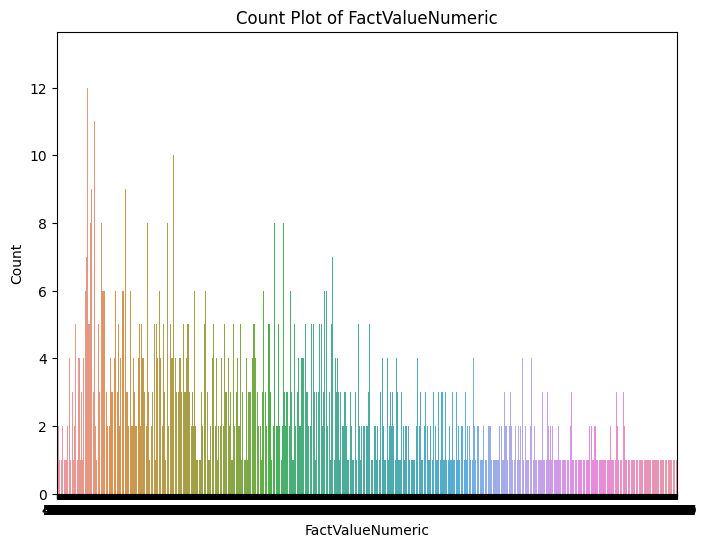

In [ ]:
#Univariate Analysis
# plot the distribution using histogram
# Create a count plot for 'FactValueNumeric'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='FactValueNumeric', data=dataset)
plt.title('Count Plot of FactValueNumeric')
plt.xlabel('FactValueNumeric')
plt.ylabel('Count')
plt.show()

7.40     13
7.92     12
7.45     12
7.78     11
8.05     11
         ..
57.46     1
56.32     1
55.83     1
55.76     1
92.79     1
Name: FactValueNumeric, Length: 3954, dtype: int64


<Axes: xlabel='FactValueNumeric', ylabel='count'>

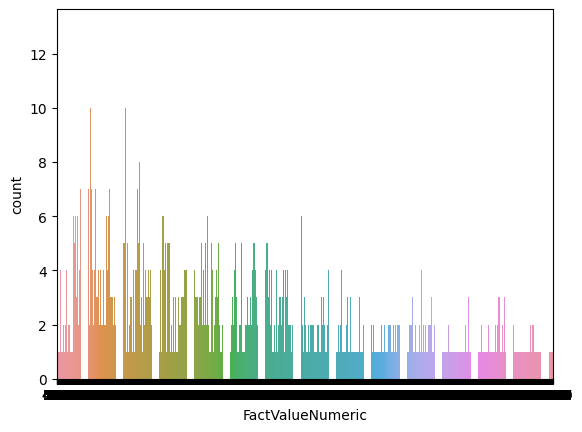

In [ ]:
# Count the occurrences of unique values in the 'FactValueNumeric' column and print the counts
print(dataset['FactValueNumeric'].value_counts())

# Create a count plot for 'FactValueNumeric'
sns.countplot(x='FactValueNumeric', data=dataset)


6.21     20
6.06     17
6.13     16
7.16     15
7.09     14
         ..
39.12     1
21.11     1
40.17     1
39.75     1
66.17     1
Name: FactValueNumericLow, Length: 3241, dtype: int64


<Axes: ylabel='count'>

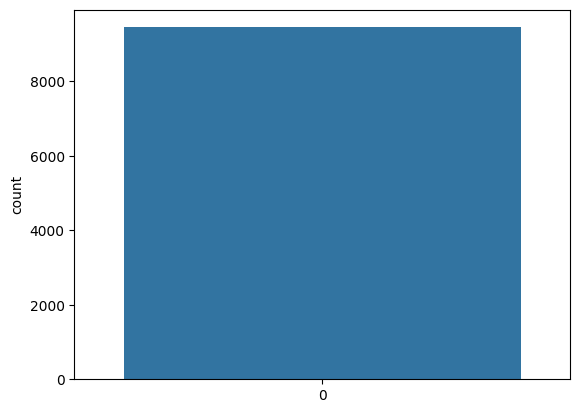

In [ ]:
print(dataset['FactValueNumericLow'].value_counts())
sns.countplot(dataset['FactValueNumericLow'])

17.56     12
13.49     11
14.43     10
19.11     10
13.37     10
          ..
10.63      1
62.75      1
63.93      1
61.26      1
128.40     1
Name: FactValueNumericHigh, Length: 5002, dtype: int64


<Axes: ylabel='count'>

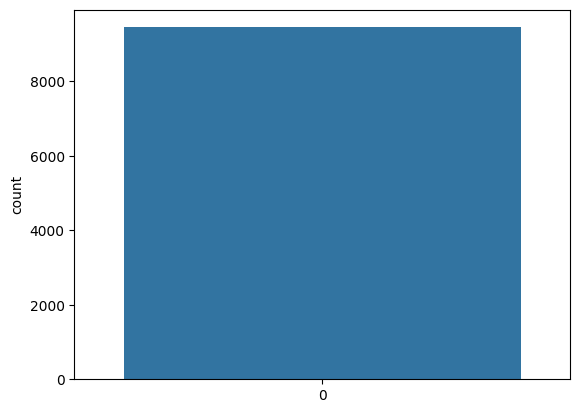

In [ ]:
print(dataset['FactValueNumericHigh'].value_counts())
sns.countplot(dataset['FactValueNumericHigh'])

0.0
-1.2242552289208233


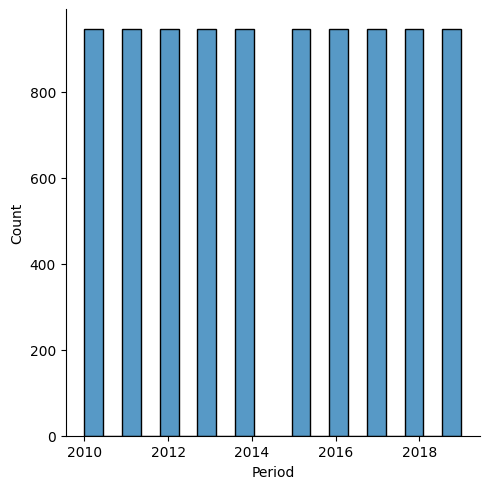

In [ ]:
sns.displot(dataset['Period'])
print(dataset['Period'].skew())
print(dataset['Period'].kurt())

<Axes: >

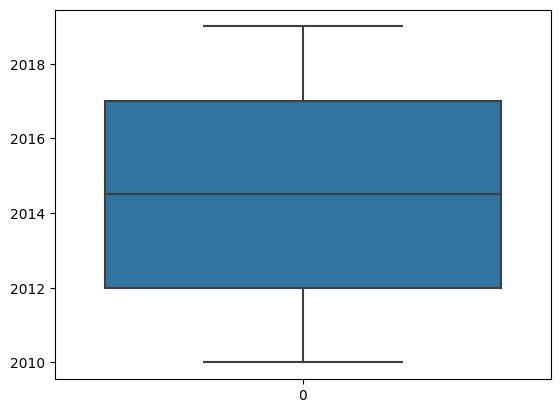

In [ ]:
#
sns.boxplot(dataset['Period'])

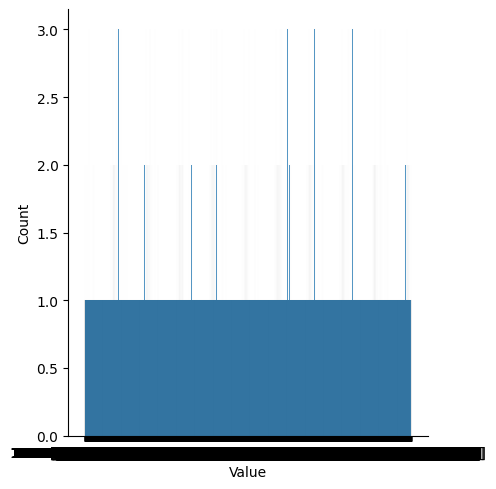

In [ ]:
sns.displot(dataset['Value'])

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


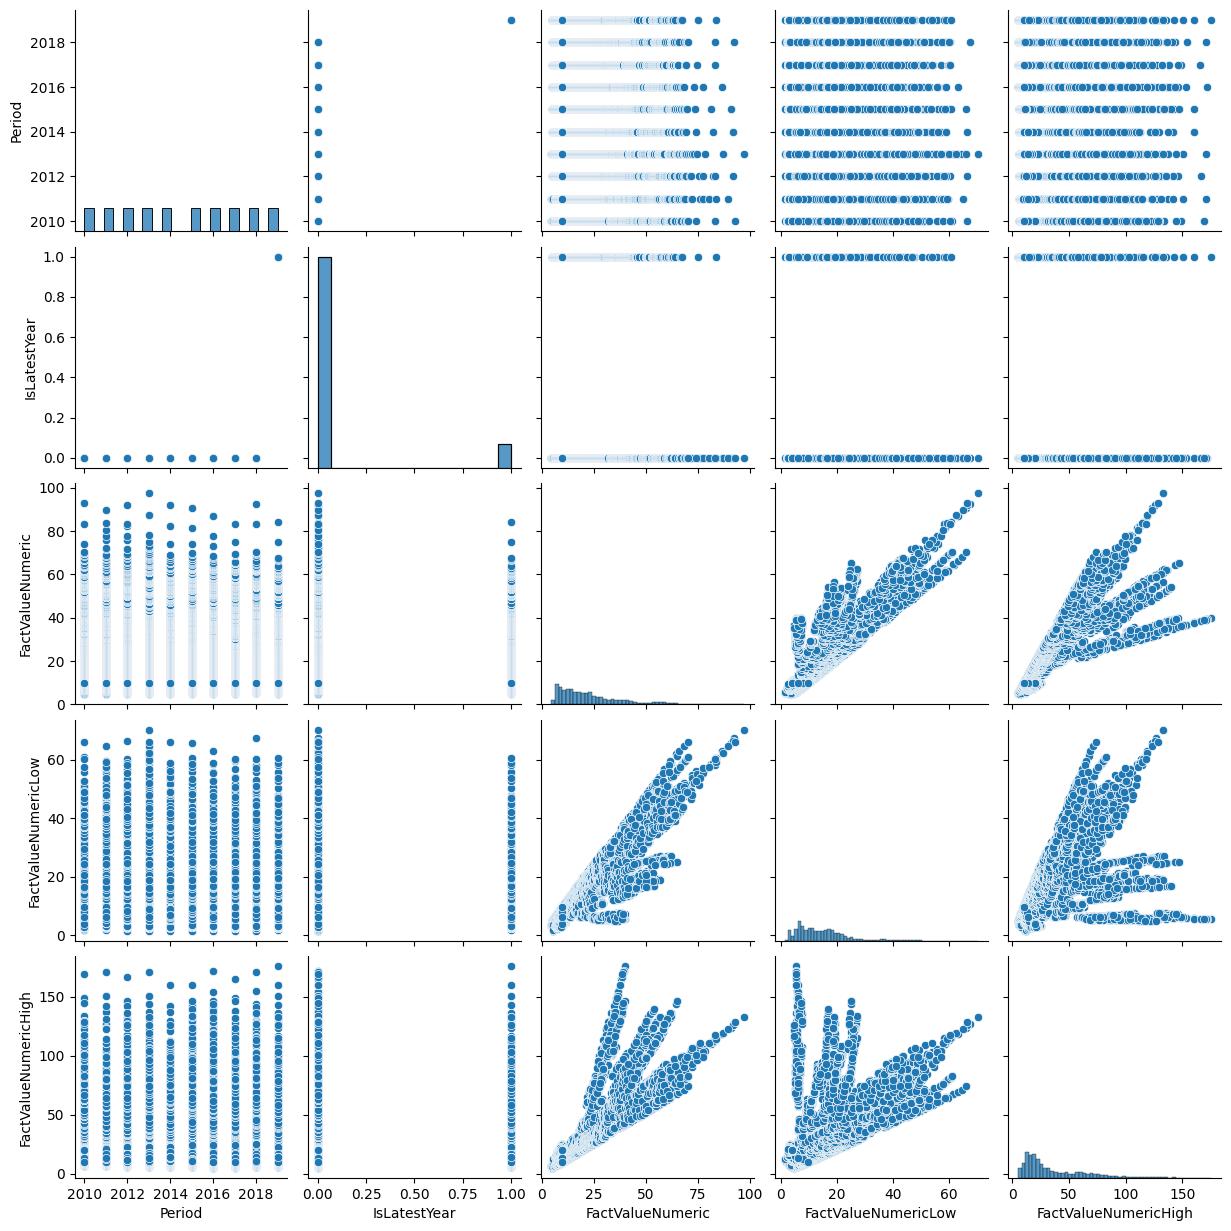

In [ ]:
sns.pairplot(dataset)

<ipython-input-17-3a73cb600a25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True);


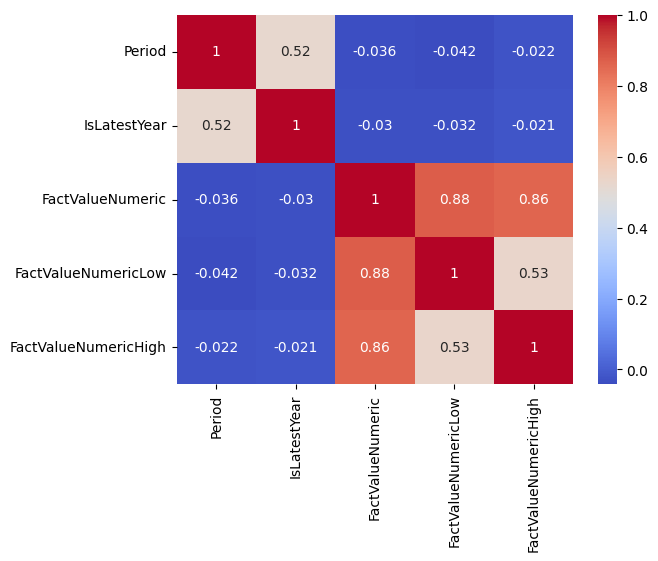

In [ ]:
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True);

In [ ]:
#one hot encoding
#dataset.sample(6)
pd.get_dummies(data=dataset, columns=['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim1ValueCode'], drop_first=True)
# filter('ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim1ValueCode')

,Period,IsLatestYear,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,ParentLocationCode_AMR,ParentLocationCode_EMR,ParentLocationCode_EUR,ParentLocationCode_SEAR,...,Location_Zambia,Location_Zimbabwe,Dim1_Rural,Dim1_Total,Dim1_Towns,Dim1_Urban,Dim1ValueCode_RESIDENCEAREATYPE_TOTL,Dim1ValueCode_RUR,Dim1ValueCode_TOWN,Dim1ValueCode_URB
0,2019,True,10.01,6.29,13.74,10.01 [6.29 – 13.74],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,True,10.02,7.44,12.55,10.02 [7.44 – 12.55],1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2019,True,10.06,9.73,10.39,10.06 [9.73 – 10.39],0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,True,10.08,7.07,13.20,10.08 [7.07 – 13.2],1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2019,True,10.09,8.23,12.46,10.09 [8.23 – 12.46],1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,2010,False,9.92,3.91,20.28,9.92 [3.91 – 20.28],1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9446,2010,False,9.92,7.80,12.89,9.92 [7.8 – 12.89],1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9447,2010,False,9.94,6.30,13.57,9.94 [6.3 – 13.57],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9448,2010,False,9.95,9.78,10.11,9.95 [9.78 – 10.11],1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Helan's

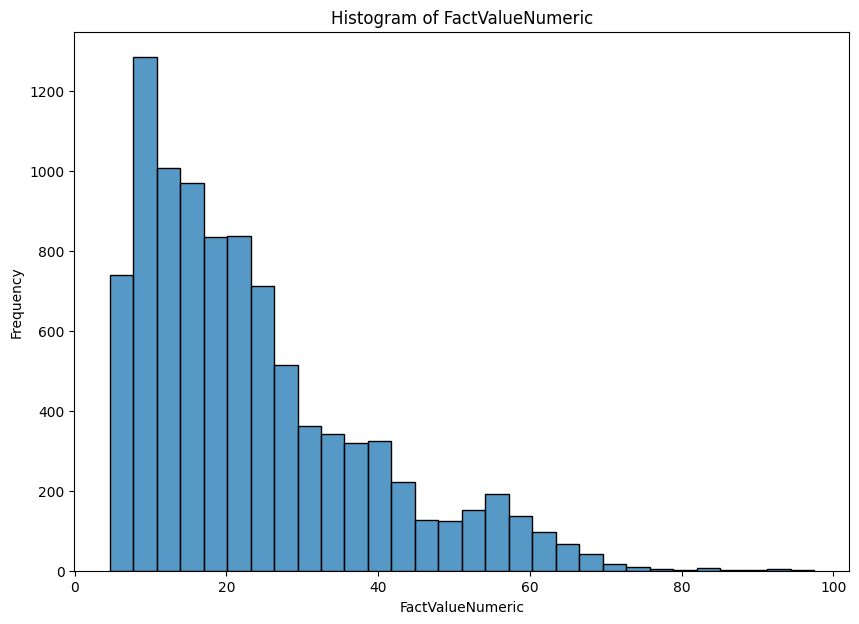

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumeric'], bins=30)
plt.xlabel('FactValueNumeric')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumeric')
plt.show()

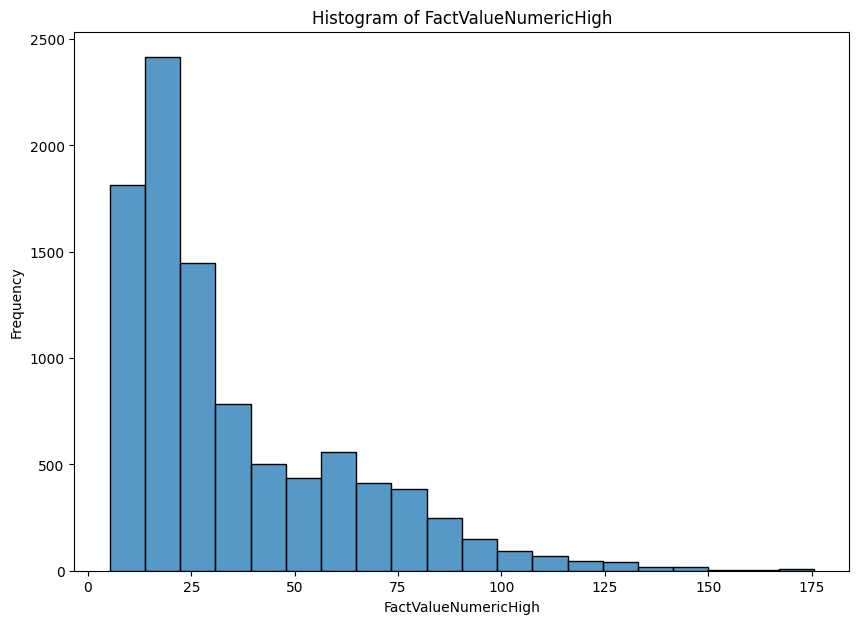

In [ ]:

plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumericHigh'], bins=20)
plt.xlabel('FactValueNumericHigh')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumericHigh')
plt.show()

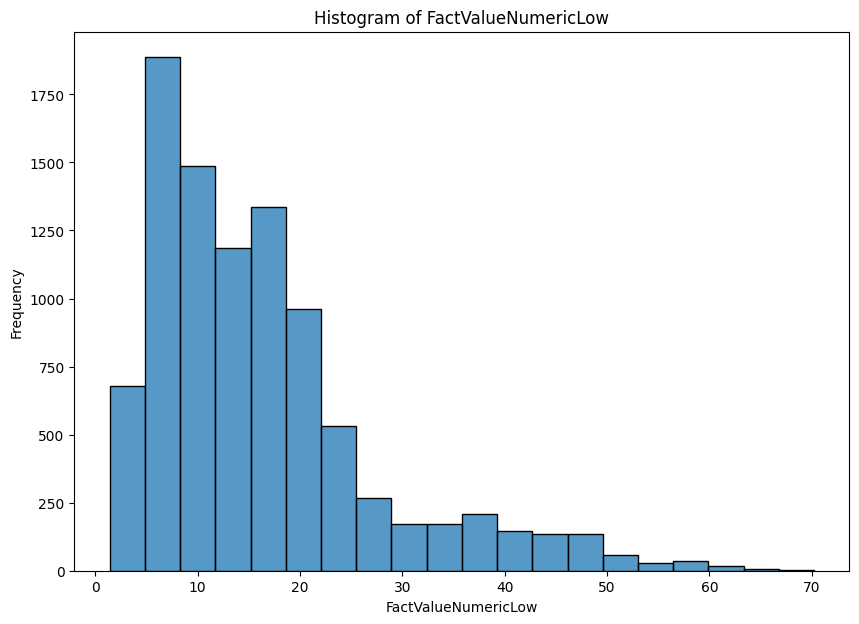

In [ ]:

plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumericLow'], bins=20)
plt.xlabel('FactValueNumericLow')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumericLow')
plt.show()

In [ ]:
subset_df = dataset[['FactValueNumeric', 'FactValueNumericLow']]

subset_df

,FactValueNumeric,FactValueNumericLow
0,10.01,6.29
1,10.02,7.44
2,10.06,9.73
3,10.08,7.07
4,10.09,8.23
...,...,...
9445,9.92,3.91
9446,9.92,7.80
9447,9.94,6.30
9448,9.95,9.78


In [ ]:
subset_df = dataset[['FactValueNumericHigh', 'FactValueNumericLow']]

subset_df


,FactValueNumericHigh,FactValueNumericLow
0,13.74,6.29
1,12.55,7.44
2,10.39,9.73
3,13.20,7.07
4,12.46,8.23
...,...,...
9445,20.28,3.91
9446,12.89,7.80
9447,13.57,6.30
9448,10.11,9.78


In [ ]:
# Check for missing values
print(subset_df.isnull().sum())

FactValueNumericHigh    0
FactValueNumericLow     0
dtype: int64


In [ ]:
# Calculate the correlation matrix
correlation_matrix = subset_df.corr()
correlation_matrix

,FactValueNumericHigh,FactValueNumericLow
FactValueNumericHigh,1.000000,0.530305
FactValueNumericLow,0.530305,1.000000


In [ ]:
# #Create a scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='FactValueNumeric', y='FactValueNumericLow', data=subset_df)
# plt.title('Scatter Plot of FactValueNumeric vs. FactValueNumericLow')
# plt.xlabel('FactValueNumeric')
# plt.ylabel('FactValueNumericLow')
# plt.show()

In [ ]:
# #Create a scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='FactValueNumeric', y='FactValueNumericHigh', data=subset_df)
# plt.title('Scatter Plot of FactValueNumeric vs. FactValueNumericHigh')
# plt.xlabel('FactValueNumeric')
# plt.ylabel('FactValueNumericHigh')
# plt.show()

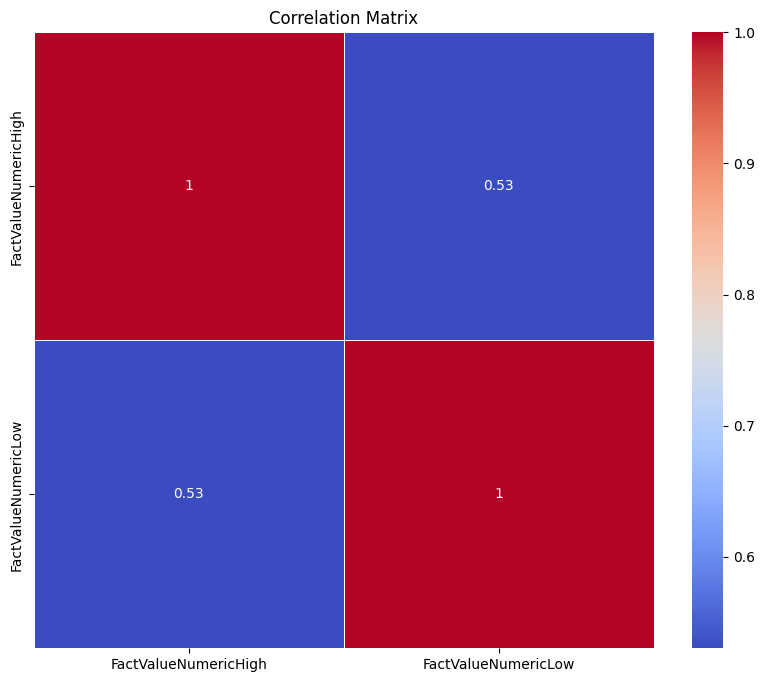

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(dataset.columns)

Index(['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Period', 'IsLatestYear', 'Dim1', 'Dim1ValueCode',
       'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
       'Value'],
      dtype='object')


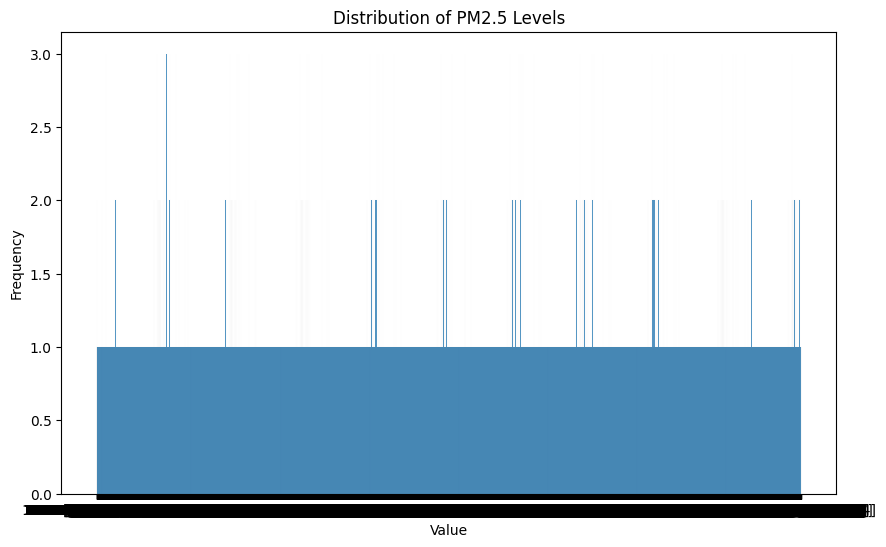

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Value')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = dataset.describe()
summary_stats

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,9450.000000,9450.000000,9450.000000,9450.000000
mean,2014.500000,23.538435,16.229705,35.475423
std,2.872433,15.024029,11.174679,27.150003
min,2010.000000,4.590000,1.410000,5.260000
25%,2012.000000,11.920000,7.850000,15.950000
50%,2014.500000,19.570000,13.790000,24.480000
75%,2017.000000,30.977500,20.340000,49.687500
max,2019.000000,97.490000,70.240000,175.600000


In [ ]:
# Display the summary statistics
print(summary_stats)

            Period  FactValueNumeric  FactValueNumericLow  \
count  9450.000000       9450.000000          9450.000000   
mean   2014.500000         23.538435            16.229705   
std       2.872433         15.024029            11.174679   
min    2010.000000          4.590000             1.410000   
25%    2012.000000         11.920000             7.850000   
50%    2014.500000         19.570000            13.790000   
75%    2017.000000         30.977500            20.340000   
max    2019.000000         97.490000            70.240000   

       FactValueNumericHigh  
count           9450.000000  
mean              35.475423  
std               27.150003  
min                5.260000  
25%               15.950000  
50%               24.480000  
75%               49.687500  
max              175.600000  


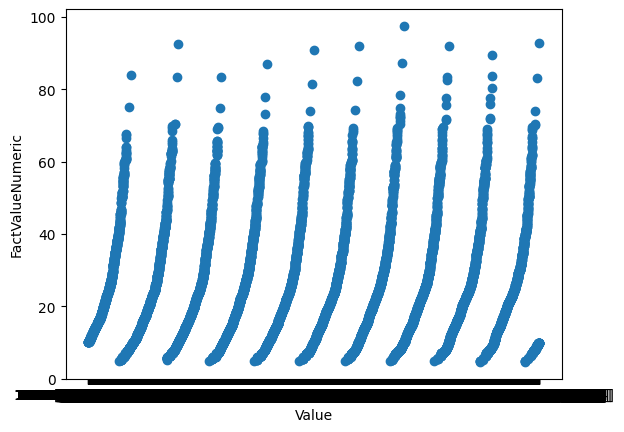

In [ ]:
# Create a scatter plot for two columns (e.g., 'Value' and 'AnotherVariable')
plt.scatter(dataset['Value'], dataset['FactValueNumeric'])
plt.xlabel('Value')
plt.ylabel('FactValueNumeric')
plt.show()

<Axes: >

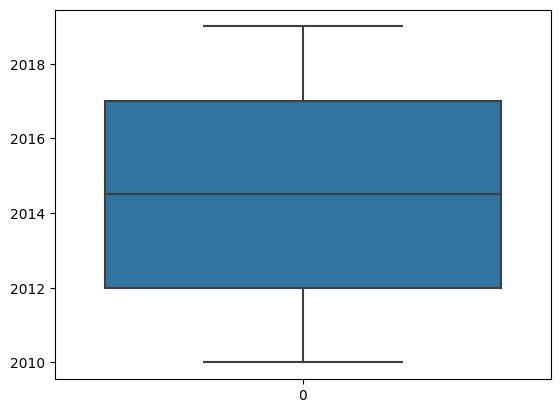

In [ ]:
#\

sns.boxplot(dataset['Period'])

<Axes: >

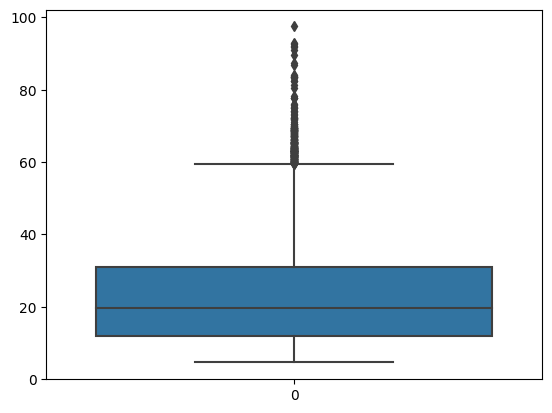

In [ ]:
#
sns.boxplot(dataset['FactValueNumeric'])

<Axes: >

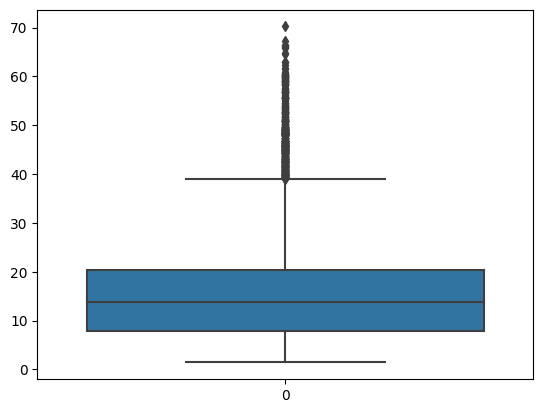

In [ ]:
#
sns.boxplot(dataset['FactValueNumericLow'])

<Axes: >

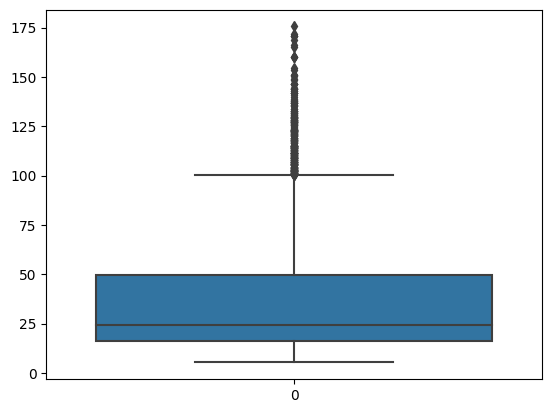

In [ ]:
#
sns.boxplot(dataset['FactValueNumericHigh'])

In [ ]:
# Define AQI categories and their corresponding value ranges
AQI_Category = {
    'Good': (0, 12),
    'Moderate': (12.1, 35.4),
    'Unhealthy': (35.5, 55.4),
    'Hazardous': (55.5, 97.49)
}
AQI_Category

{'Good': (0, 12),
 'Moderate': (12.1, 35.4),
 'Unhealthy': (35.5, 55.4),
 'Hazardous': (55.5, 97.49)}

In [ ]:
import pandas as pd


# Create a new column 'Label' based on AQI categories
dataset['Label'] = pd.cut(dataset['FactValueNumeric'], bins=[-float('inf')] + [range[1] for range in AQI_Category.values()], labels=AQI_Category.keys())


In [ ]:
dataset['Label']

0            Good
1            Good
2            Good
3            Good
4            Good
          ...    
9445         Good
9446         Good
9447         Good
9448         Good
9449    Hazardous
Name: Label, Length: 9450, dtype: category
Categories (4, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Hazardous']

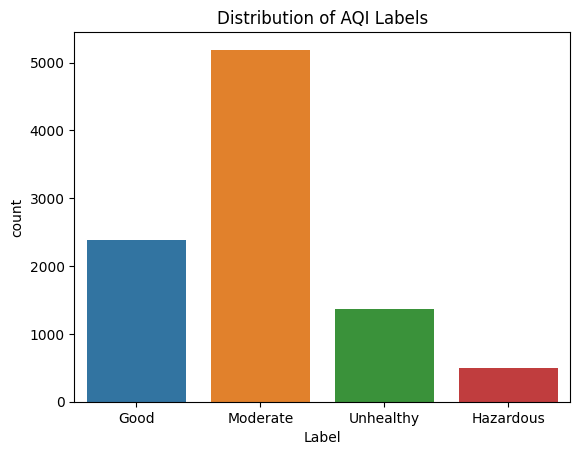

In [ ]:
import seaborn as sns
# Countplot to visualize the distribution of labels
sns.countplot(x='Label', data=dataset)
plt.title('Distribution of AQI Labels')
plt.show()

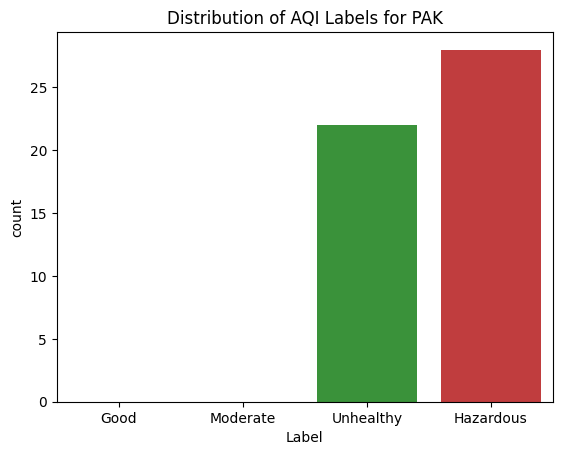

In [ ]:


# Specify the country's SpatialDimValueCode
selected_country_code = 'PAK'

# Filter the dataset for the selected country
selected_country_data = dataset[dataset['SpatialDimValueCode'] == selected_country_code]

# Countplot to visualize the distribution of labels for the selected country
sns.countplot(x='Label', data=selected_country_data)
plt.title(f'Distribution of AQI Labels for {selected_country_code}')
plt.show()


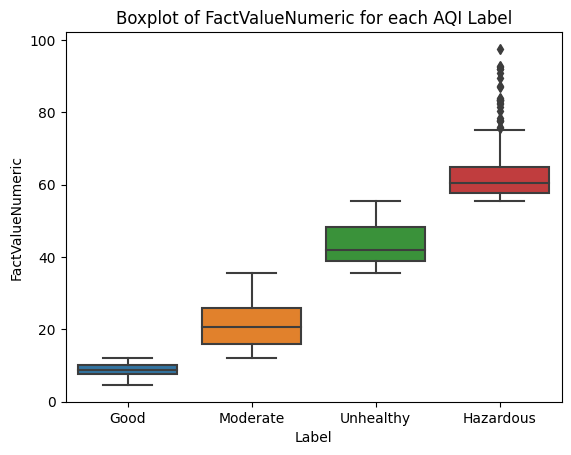

In [ ]:
# Boxplot to show the spread of 'FactValueNumeric' for each label
sns.boxplot(x='Label', y='FactValueNumeric', data=dataset, order=AQI_Category.keys())
plt.title('Boxplot of FactValueNumeric for each AQI Label')
plt.show()

In [ ]:
import pandas as pd


# Create a new column 'Label' based on AQI categories
dataset['Timestamp'] = pd.cut(dataset['FactValueNumeric'], bins=[-float('inf')] + [range[1] for range in AQI_Category.values()], labels=AQI_Category.keys())

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt


# # Replace 'AQI' with the actual column name in your dataset representing the AQI values
# aqi_column = 'AQI_Category'

# # Example: Creating a date range for the next 2 years based on the index
# future_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=730, freq='D')

# # Fit ARIMA model
# model = ARIMA(dataset[aqi_column], order=(1, 1, 1))  # Adjust order based on your data
# fit_model = model.fit()

# # Predict AQI for the next 2 years
# future_predictions = fit_model.get_forecast(steps=730).predicted_mean

# # Plotting historical data and predictions
# plt.figure(figsize=(12, 6))
# plt.plot(dataset.index, dataset[aqi_column], label='Historical Data')
# plt.plot(future_index, future_predictions, label='Predictions')
# plt.title('AQI Prediction for the Next 2 Years')
# plt.xlabel('Index (Time Proxy)')
# plt.ylabel('AQI_Category')
# plt.legend()
# plt.show()


In [ ]:
# Count the number of values for each class of label
label_counts = dataset['Label'].value_counts()

# Print the counts
print("Number of values for each class of label:")
print(label_counts)

Number of values for each class of label:
Moderate     5191
Good         2385
Unhealthy    1374
Hazardous     500
Name: Label, dtype: int64


In [ ]:
from sklearn.utils import resample

# Count the number of values for each class of label
label_counts = dataset['Label'].value_counts()

# Print the counts before augmentation
print("Number of values for each class of label (before augmentation):")
print(label_counts)

# Find the class with the maximum count
max_count = label_counts.max()

# Resample each class to have the same count as the class with the maximum count
df_resampled = pd.concat([
    resample(dataset[dataset['Label'] == label], replace=True, n_samples=max_count, random_state=42)
    for label in label_counts.index
])

# Count the number of values for each class of label after augmentation
label_counts_after_augmentation = df_resampled['Label'].value_counts()

# Print the counts after augmentation
print("\nNumber of values for each class of label (after augmentation):")
print(label_counts_after_augmentation)

Number of values for each class of label (before augmentation):
Moderate     5191
Good         2385
Unhealthy    1374
Hazardous     500
Name: Label, dtype: int64

Number of values for each class of label (after augmentation):
Good         5191
Moderate     5191
Unhealthy    5191
Hazardous    5191
Name: Label, dtype: int64


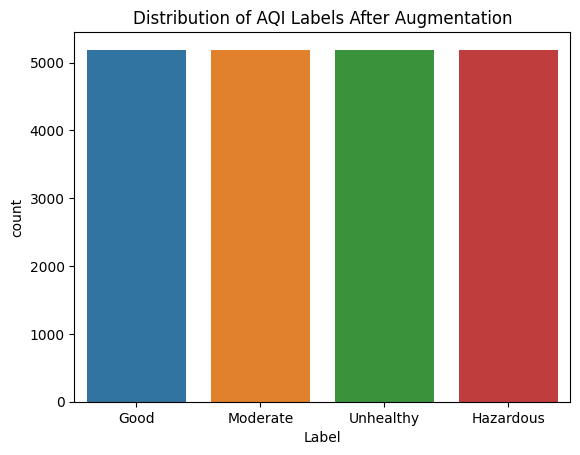

In [ ]:
import seaborn as sns
# Countplot to visualize the distribution of labels
sns.countplot(x='Label', data=df_resampled)
plt.title('Distribution of AQI Labels After Augmentation')
plt.show()

In [ ]:
dataset.columns

Index(['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Period', 'IsLatestYear', 'Dim1', 'Dim1ValueCode',
       'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
       'Value', 'Label', 'Timestamp'],
      dtype='object')

In [ ]:
#perform eda on new created column label
#

In [ ]:
#Determine the category for a given AQI value
aqi_value = 250.5
category = None

for cat, (lower, upper) in AQI_Category.items():
    if lower <= aqi_value <= upper:
        category = cat
        break

print(f'The AQI category for AQI {aqi_value} is {category}')

The AQI category for AQI 250.5 is None


In [ ]:
dataset['AQI_Category'] = pd.cut(dataset['FactValueNumeric'], bins=[0, 12.1, 35.5, 55.5, 97.49],
                            labels=['Good', 'Moderate', 'Unhealthy', 'Hazardous'
                            ])
dataset['AQI_Category']

0            Good
1            Good
2            Good
3            Good
4            Good
          ...    
9445         Good
9446         Good
9447         Good
9448         Good
9449    Hazardous
Name: AQI_Category, Length: 9450, dtype: category
Categories (4, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Hazardous']

<Figure size 6000x3000 with 0 Axes>

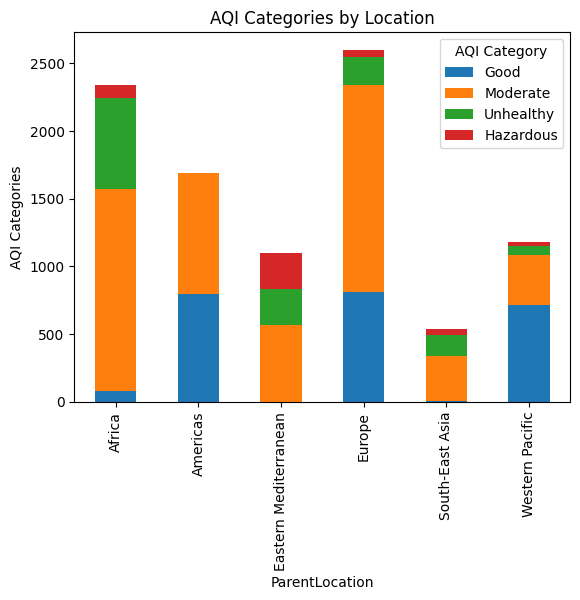

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define AQI categories and apply them based on 'FactValueNumeric' column
dataset['AQI_Category'] = pd.cut(dataset['FactValueNumeric'],
                            bins=[0, 12.1, 35.5, 55.5, 97.49],
                            labels=['Good', 'Moderate', 'Unhealthy', 'Hazardous'])
modifiled_dataset = dataset['AQI_Category']


# # Group data by 'Location' and 'AQI_Category' and count occurrences
location_aqi_counts = dataset.groupby(['ParentLocation', 'AQI_Category']).size().unstack(fill_value=0)

# Plot the AQI categories for each location
plt.figure(figsize=(60, 30))
location_aqi_counts.plot(kind='bar', stacked=True)

plt.title('AQI Categories by Location')
plt.xlabel('ParentLocation')
plt.ylabel('AQI Categories')
plt.legend(title='AQI Category')
plt.show()

<Figure size 6000x3000 with 0 Axes>

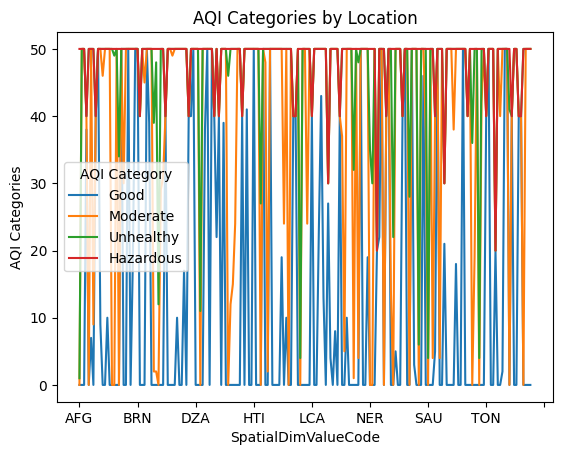

In [ ]:
# Define AQI categories and apply them based on 'FactValueNumeric' column
dataset['AQI_Category'] = pd.cut(dataset['FactValueNumeric'],
                            bins=[0, 12.1, 35.5, 55.5, 97.49],
                            labels=['Good', 'Moderate', 'Unhealthy', 'Hazardous'])

# Group data by 'Location' and 'AQI_Category' and count occurrences
location_aqi_counts = dataset.groupby(['SpatialDimValueCode', 'AQI_Category']).size().unstack(fill_value=0)

# Plot the AQI categories for each location
plt.figure(figsize=(60, 30))
location_aqi_counts.plot(kind='line',stacked=True)

plt.title('AQI Categories by Location')
plt.xlabel('SpatialDimValueCode')
plt.ylabel('AQI Categories')
plt.legend(title='AQI Category')
plt.show()

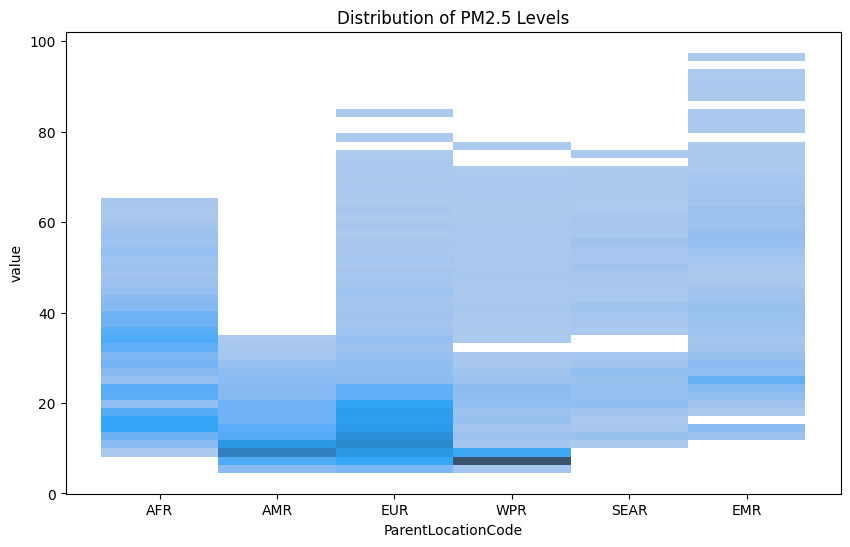

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ParentLocationCode',y='FactValueNumeric', kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('ParentLocationCode')
plt.ylabel('value')
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
# Afrom google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Step 1: Load and Inspect the Data

In [ ]:
import pandas as pd

# Load the dataset

file_path = '/content/drive/MyDrive/CapstoneProject/augmented_data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Label,AQI_Category
0,EUR,Europe,SRB,Serbia,2018,False,Rural,RUR,24.88,22.60,26.87,24.88 [22.6 – 26.87],Moderate,Moderate
1,AFR,Africa,MWI,Malawi,2012,False,Towns,TOWN,18.96,6.19,38.51,18.96 [6.19 – 38.51],Moderate,Moderate
2,EUR,Europe,FRA,France,2013,False,Urban,URB,14.15,13.86,14.47,14.15 [13.86 – 14.47],Moderate,Moderate
3,AFR,Africa,CPV,Cabo Verde,2019,True,Cities,CITY,33.14,17.79,58.96,33.14 [17.79 – 58.96],Moderate,Moderate
4,EUR,Europe,GEO,Georgia,2011,False,Rural,RUR,23.29,16.90,31.52,23.29 [16.9 – 31.52],Moderate,Moderate


In [ ]:
# import pandas as pd


# # Create a new column 'Label' based on AQI categories
# dataset['Label'] = pd.cut(dataset['FactValueNumeric'], bins=[-float('inf')] + [range[1] for range in AQI_Category.values()], labels=AQI_Category.keys())


In [ ]:
# Step 2: Data Preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features and target variable
X = dataset[['Period', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
          'ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim1ValueCode']]
y = dataset['Label']



In [ ]:
dataset

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Label,AQI_Category
0,EUR,Europe,SRB,Serbia,2018,False,Rural,RUR,24.88,22.60,26.87,24.88 [22.6 – 26.87],Moderate,Moderate
1,AFR,Africa,MWI,Malawi,2012,False,Towns,TOWN,18.96,6.19,38.51,18.96 [6.19 – 38.51],Moderate,Moderate
2,EUR,Europe,FRA,France,2013,False,Urban,URB,14.15,13.86,14.47,14.15 [13.86 – 14.47],Moderate,Moderate
3,AFR,Africa,CPV,Cabo Verde,2019,True,Cities,CITY,33.14,17.79,58.96,33.14 [17.79 – 58.96],Moderate,Moderate
4,EUR,Europe,GEO,Georgia,2011,False,Rural,RUR,23.29,16.90,31.52,23.29 [16.9 – 31.52],Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20759,EMR,Eastern Mediterranean,EGY,Egypt,2017,False,Towns,TOWN,57.65,37.43,87.43,57.65 [37.43 – 87.43],Hazardous,Hazardous
20760,EUR,Europe,TJK,Tajikistan,2017,False,Total,RESIDENCEAREATYPE_TOTL,59.39,40.92,86.57,59.39 [40.92 – 86.57],Hazardous,Hazardous
20761,WPR,Western Pacific,MNG,Mongolia,2013,False,Cities,CITY,72.09,54.65,90.77,72.09 [54.65 – 90.77],Hazardous,Hazardous
20762,AFR,Africa,TCD,Chad,2016,False,Cities,CITY,64.41,24.91,143.90,64.41 [24.91 – 143.9],Hazardous,Hazardous


In [ ]:

# Encoding categorical features and scaling numerical features
categorical_features = ['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim1ValueCode', 'ParentLocationCode']
numerical_features = ['Period', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
# Step 3: Model Building and Evaluation


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models and their performances
models = {
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        results[model_name] = {"Accuracy": accuracy, "Report": report}

    return results


In [ ]:

# Training and evaluating models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    model_results = {}
    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        model_results[model_name] = {"Accuracy": accuracy, "Report": report}

    return model_results

# Call the train_and_evaluate function with your actual data
model_results = train_and_evaluate(models, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

# Displaying the results
for model_name, metrics in model_results.items():
    print(f"{model_name}:\nAccuracy: {metrics['Accuracy']}\nClassification Report:\n{metrics['Report']}\n")


Support Vector Machine:
Accuracy: 0.9730315434625572
Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.99      0.98      1060
   Hazardous       0.97      0.99      0.98      1028
    Moderate       0.98      0.95      0.97      1034
   Unhealthy       0.96      0.96      0.96      1031

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153


Random Forest:
Accuracy: 0.9992776306284613
Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      1060
   Hazardous       1.00      1.00      1.00      1028
    Moderate       1.00      1.00      1.00      1034
   Unhealthy       1.00      1.00      1.00      1031

    accuracy                           1.00      4153
   macro avg       1.00      1.00      1.00      4153
weighted avg       1.00      1.00      1.

In [ ]:
# Step 4: Making Predictions and Analyzing Results


In [ ]:
# Choose a model for inference (e.g., Random Forest)
selected_model = models['Random Forest']

# Make predictions on the test set
y_pred = selected_model.predict(X_test_preprocessed)

# Display some predictions
print("Sample predictions:", y_pred[:10])

# Comparing with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

Sample predictions: ['Unhealthy' 'Good' 'Unhealthy' 'Unhealthy' 'Moderate' 'Unhealthy'
 'Hazardous' 'Moderate' 'Moderate' 'Good']
          Actual  Predicted
14630  Unhealthy  Unhealthy
7049        Good       Good
14413  Unhealthy  Unhealthy
11026  Unhealthy  Unhealthy
2617    Moderate   Moderate
12434  Unhealthy  Unhealthy
19976  Hazardous  Hazardous
3784    Moderate   Moderate
2554    Moderate   Moderate
8748        Good       Good


In [ ]:

# Step 5: Visualizing the Results


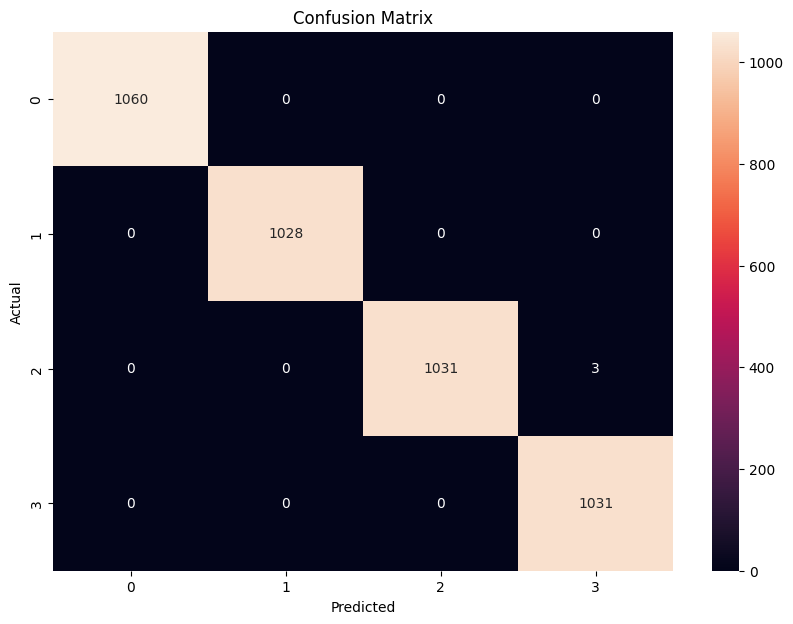

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Error Analysis


In [ ]:

# Identifying where predictions are incorrect
errors = comparison[comparison['Actual'] != comparison['Predicted']]
print("Number of misclassified samples:", len(errors))
print("Misclassified samples:\n", errors.head(10))

# Analyze the characteristics of these errors
# For example, are there certain classes or features associated with higher error rates?


Number of misclassified samples: 3
Misclassified samples:
         Actual  Predicted
2725  Moderate  Unhealthy
3489  Moderate  Unhealthy
485   Moderate  Unhealthy


In [ ]:
# Detailed Examination of Misclassifications


In [ ]:


# Detailed look at the misclassified samples
misclassified_details = X_test.join(y_test).join(comparison['Predicted'])[comparison['Actual'] != comparison['Predicted']]
print("Details of misclassified samples:\n", misclassified_details)

Details of misclassified samples:
       Period  FactValueNumeric  FactValueNumericLow  FactValueNumericHigh  \
2725    2012             35.31                24.84                 49.60   
3489    2010             35.02                16.72                 64.95   
485     2012             35.31                24.84                 49.60   

     ParentLocationCode ParentLocation SpatialDimValueCode      Location  \
2725                EUR         Europe                 TKM  Turkmenistan   
3489                AFR         Africa                 SLE  Sierra Leone   
485                 EUR         Europe                 TKM  Turkmenistan   

       Dim1 Dim1ValueCode     Label  Predicted  
2725  Urban           URB  Moderate  Unhealthy  
3489  Towns          TOWN  Moderate  Unhealthy  
485   Urban           URB  Moderate  Unhealthy  


In [ ]:
# Distribution of Predictions


In [ ]:
# Distribution of predictions
prediction_distribution = pd.Series(y_pred).value_counts()
print("Distribution of predictions:\n", prediction_distribution)

# Compare with actual distribution
actual_distribution = y_test.value_counts()
print("Actual distribution:\n", actual_distribution)

Distribution of predictions:
 Good         1060
Unhealthy    1034
Moderate     1031
Hazardous    1028
dtype: int64
Actual distribution:
 Good         1060
Moderate     1034
Unhealthy    1031
Hazardous    1028
Name: Label, dtype: int64


In [ ]:
# Analyzing Misclassifications in Context
#### Examine if there's a pattern or similarity in the misclassified samples
#### E.g., are they from a specific location, period, or do they have similar feature values?
#* Confidence Level in Correct Predictions

In [ ]:
# For models that can provide probabilities (like Random Forest or Logistic Regression)
correct_predictions = comparison[comparison['Actual'] == comparison['Predicted']]
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)
probabilities = rf_model.predict_proba(X_test_preprocessed)
# Resetting index to align with the probabilities array
correct_predictions_reset_index = correct_predictions.reset_index(drop=True)
correct_probs = probabilities[correct_predictions_reset_index.index]

# Analyze the confidence levels of correct predictions
confidence_correct = pd.Series(correct_probs.max(axis=1))
print("Confidence levels in correct predictions:\n", confidence_correct.describe())


Confidence levels in correct predictions:
 count    4150.000000
mean        0.995834
std         0.022979
min         0.540000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64


In [ ]:
# Visualizing Prediction Confidence


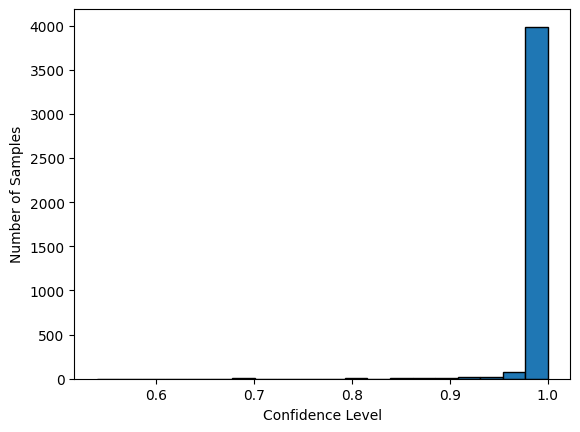

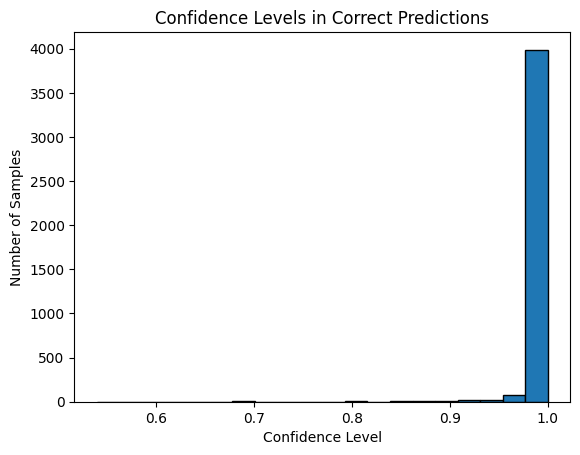

In [ ]:
import matplotlib.pyplot as plt

# Histogram of confidence levels
correct_probs = probabilities[correct_predictions_reset_index.index]
confidence_correct = pd.Series(correct_probs.max(axis=1))

# Histogram of confidence levels
plt.hist(confidence_correct, bins=20, edgecolor='black')
plt.xlabel('Confidence Level')
plt.ylabel('Number of Samples')
plt.show()

plt.hist(confidence_correct, bins=20, edgecolor='black')
plt.xlabel('Confidence Level')
plt.ylabel('Number of Samples')
plt.title('Confidence Levels in Correct Predictions')
plt.show()

Top 10 important features:
                                        Feature  Importance
1                        num__FactValueNumeric    0.262965
3                    num__FactValueNumericHigh    0.180787
2                     num__FactValueNumericLow    0.165995
418                cat__ParentLocationCode_EMR    0.015486
6                  cat__ParentLocationCode_EMR    0.013680
12   cat__ParentLocation_Eastern Mediterranean    0.013527
11                cat__ParentLocation_Americas    0.012487
4                  cat__ParentLocationCode_AFR    0.010769
10                  cat__ParentLocation_Africa    0.009942
0                                  num__Period    0.009692


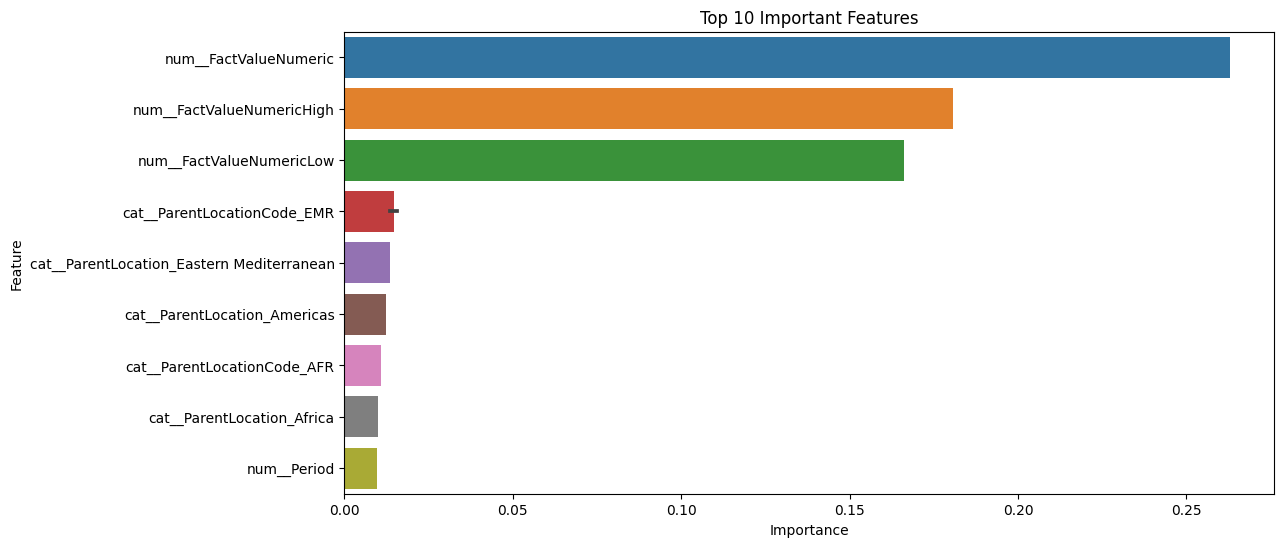

In [ ]:
# This is applicable if  use a Random Forest
importances = selected_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top 10 important features:\n", feature_importance_df.head(10))

# Visualizing Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Probability Output

In [ ]:
# This section is relevant if your model can output probabilities (e.g., Random Forest or Logistic Regression)
probabilities = selected_model.predict_proba(X_test_preprocessed)

# Convert to a DataFrame for easier analysis
prob_df = pd.DataFrame(probabilities, columns=selected_model.classes_)

# Analyze the distribution of probabilities
# For example, how often is the model very confident in its predictions?
print("Sample prediction probabilities:\n", prob_df.head(10))

# You might want to look at cases with high uncertainty
high_uncertainty = prob_df.max(axis=1) < 0.6  # Threshold for uncertainty, can be adjusted
print("Number of high uncertainty predictions:", high_uncertainty.sum())

Sample prediction probabilities:
    Good  Hazardous  Moderate  Unhealthy
0   0.0       0.01       0.0       0.99
1   1.0       0.00       0.0       0.00
2   0.0       0.00       0.0       1.00
3   0.0       0.00       0.0       1.00
4   0.0       0.00       1.0       0.00
5   0.0       0.01       0.0       0.99
6   0.0       1.00       0.0       0.00
7   0.0       0.00       1.0       0.00
8   0.0       0.00       1.0       0.00
9   1.0       0.00       0.0       0.00
Number of high uncertainty predictions: 1
